<a href="https://colab.research.google.com/github/kivvgsr/data-science/blob/main/rainfall_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Rain Prediction in Australia**

In [258]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [259]:
import pandas as pd
import matplotlib as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, accuracy_score
import sklearn.metrics as metrics

In [260]:
import pandas as pd

# Define the URL
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillUp/labs/ML-FinalAssignment/Weather_Data.csv'

# Read the data from the URL into a DataFrame
df = pd.read_csv(url)

# Display the first few rows of the DataFrame
print(df.head())



       Date  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0  2/1/2008     19.5     22.4      15.6          6.2       0.0           W   
1  2/2/2008     19.5     25.6       6.0          3.4       2.7           W   
2  2/3/2008     21.6     24.5       6.6          2.4       0.1           W   
3  2/4/2008     20.2     22.8      18.8          2.2       0.0           W   
4  2/5/2008     19.7     25.7      77.4          4.8       0.0           W   

   WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0             41          S        SSW            17            20   
1             41          W          E             9            13   
2             41        ESE        ESE            17             2   
3             41        NNE          E            22            20   
4             41        NNE          W            11             6   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0           92           84      

In [261]:
df.shape[0]

3271

In [262]:
nan_df = df.isna()
nan_count = nan_df.sum()
nan_count

Date             0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

## hence the data dosent contain any NaN values . lets visualize the data and pre process it.

In [263]:
df.head(30)

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,17,20,92,84,1017.6,1017.4,8,8,20.7,20.9,Yes,Yes
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,W,41,W,E,9,13,83,73,1017.9,1016.4,7,7,22.4,24.8,Yes,Yes
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,17,2,88,86,1016.7,1015.6,7,8,23.5,23.0,Yes,Yes
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,W,41,NNE,E,22,20,83,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,11,6,88,74,1008.3,1004.8,8,8,22.5,25.5,Yes,Yes
5,2/6/2008,20.2,27.2,1.6,2.6,8.6,W,41,W,ENE,9,22,69,62,1002.7,998.6,6,6,23.8,26.0,Yes,Yes
6,2/7/2008,18.6,26.3,6.2,5.2,5.2,W,41,W,S,15,15,75,80,999.0,1000.3,4,7,21.7,22.3,Yes,Yes
7,2/8/2008,17.2,22.3,27.6,5.8,2.1,W,41,S,SE,7,15,77,61,1008.3,1007.4,7,8,18.9,21.1,Yes,Yes
8,2/9/2008,16.4,20.8,12.6,4.8,3.0,W,41,SSW,W,19,9,92,91,1006.4,1007.6,7,7,17.1,16.5,Yes,Yes
9,2/10/2008,14.6,24.2,8.8,4.4,10.1,W,41,W,SSE,11,20,80,53,1014.0,1013.4,4,2,17.2,23.3,Yes,No


In [264]:
df1 = df[:-1]
df1

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,17,20,92,84,1017.6,1017.4,8,8,20.7,20.9,Yes,Yes
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,W,41,W,E,9,13,83,73,1017.9,1016.4,7,7,22.4,24.8,Yes,Yes
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,17,2,88,86,1016.7,1015.6,7,8,23.5,23.0,Yes,Yes
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,W,41,NNE,E,22,20,83,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,11,6,88,74,1008.3,1004.8,8,8,22.5,25.5,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3265,6/20/2017,11.3,20.0,4.4,2.2,5.8,W,26,W,SSW,19,9,88,60,1028.7,1025.2,6,1,11.9,19.7,Yes,No
3266,6/21/2017,8.6,19.6,0.0,2.0,7.8,SSE,37,W,SSE,22,20,73,52,1025.9,1025.3,2,2,10.5,17.9,No,No
3267,6/22/2017,9.3,19.2,0.0,2.0,9.2,W,30,W,ESE,20,7,78,53,1028.5,1024.6,2,2,11.0,18.7,No,No
3268,6/23/2017,9.4,17.7,0.0,2.4,2.7,W,24,WNW,N,15,13,85,56,1020.8,1015.0,6,6,10.2,17.3,No,No


In [265]:
df2 = df[1:-2]
df3 = df[2:-3]


In [266]:
df_merge =pd.concat([df3,df2,df1],axis =1)
df_merge

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,W,41.0,ESE,ESE,17.0,2.0,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes,2/3/2008,21.6,24.5,6.6,2.4,0.1,W,41.0,ESE,ESE,17.0,2.0,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes,2/3/2008,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,17,2,88,86,1016.7,1015.6,7,8,23.5,23.0,Yes,Yes
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,W,41.0,NNE,E,22.0,20.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes,2/4/2008,20.2,22.8,18.8,2.2,0.0,W,41.0,NNE,E,22.0,20.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes,2/4/2008,20.2,22.8,18.8,2.2,0.0,W,41,NNE,E,22,20,83,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,W,41.0,NNE,W,11.0,6.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes,2/5/2008,19.7,25.7,77.4,4.8,0.0,W,41.0,NNE,W,11.0,6.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes,2/5/2008,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,11,6,88,74,1008.3,1004.8,8,8,22.5,25.5,Yes,Yes
5,2/6/2008,20.2,27.2,1.6,2.6,8.6,W,41.0,W,ENE,9.0,22.0,69.0,62.0,1002.7,998.6,6.0,6.0,23.8,26.0,Yes,Yes,2/6/2008,20.2,27.2,1.6,2.6,8.6,W,41.0,W,ENE,9.0,22.0,69.0,62.0,1002.7,998.6,6.0,6.0,23.8,26.0,Yes,Yes,2/6/2008,20.2,27.2,1.6,2.6,8.6,W,41,W,ENE,9,22,69,62,1002.7,998.6,6,6,23.8,26.0,Yes,Yes
6,2/7/2008,18.6,26.3,6.2,5.2,5.2,W,41.0,W,S,15.0,15.0,75.0,80.0,999.0,1000.3,4.0,7.0,21.7,22.3,Yes,Yes,2/7/2008,18.6,26.3,6.2,5.2,5.2,W,41.0,W,S,15.0,15.0,75.0,80.0,999.0,1000.3,4.0,7.0,21.7,22.3,Yes,Yes,2/7/2008,18.6,26.3,6.2,5.2,5.2,W,41,W,S,15,15,75,80,999.0,1000.3,4,7,21.7,22.3,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3267,6/22/2017,9.3,19.2,0.0,2.0,9.2,W,30.0,W,ESE,20.0,7.0,78.0,53.0,1028.5,1024.6,2.0,2.0,11.0,18.7,No,No,6/22/2017,9.3,19.2,0.0,2.0,9.2,W,30.0,W,ESE,20.0,7.0,78.0,53.0,1028.5,1024.6,2.0,2.0,11.0,18.7,No,No,6/22/2017,9.3,19.2,0.0,2.0,9.2,W,30,W,ESE,20,7,78,53,1028.5,1024.6,2,2,11.0,18.7,No,No
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2/2/2008,19.5,25.6,6.0,3.4,2.7,W,41.0,W,E,9.0,13.0,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes,2/2/2008,19.5,25.6,6.0,3.4,2.7,W,41,W,E,9,13,83,73,1017.9,1016.4,7,7,22.4,24.8,Yes,Yes
3268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6/23/2017,9.4,17.7,0.0,2.4,2.7,W,24.0,WNW,N,15.0,13.0,85.0,56.0,1020.8,1015.0,6.0,6.0,10.2,17.3,No,No,6/23/2017,9.4,17.7,0.0,2.4,2.7,W,24,WNW,N,15,13,85,56,1020.8,1015.0,6,6,10.2,17.3,No,No
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2/1/2008,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,17,20,92,84,1017.6,1017.4,8,8,20.7,20.9,Yes,Yes


In [267]:
df_merge.isnull().sum().sum()

132

In [268]:
df_merge .columns
df_merge.shape[1]

66

In [269]:
cols =['Date', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Date', 'MinTemp', 'MaxTemp',
       'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed',
       'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
       'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow', 'Date',
       'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow']

In [270]:
actual_cols=df.columns
for i in actual_cols:
  k=3
  for j in range(len(cols)):
    if i==cols[j]:
      cols[j]=cols[j]+str(k)
      k=k-1
cols


['Date3',
 'MinTemp3',
 'MaxTemp3',
 'Rainfall3',
 'Evaporation3',
 'Sunshine3',
 'WindGustDir3',
 'WindGustSpeed3',
 'WindDir9am3',
 'WindDir3pm3',
 'WindSpeed9am3',
 'WindSpeed3pm3',
 'Humidity9am3',
 'Humidity3pm3',
 'Pressure9am3',
 'Pressure3pm3',
 'Cloud9am3',
 'Cloud3pm3',
 'Temp9am3',
 'Temp3pm3',
 'RainToday3',
 'RainTomorrow3',
 'Date2',
 'MinTemp2',
 'MaxTemp2',
 'Rainfall2',
 'Evaporation2',
 'Sunshine2',
 'WindGustDir2',
 'WindGustSpeed2',
 'WindDir9am2',
 'WindDir3pm2',
 'WindSpeed9am2',
 'WindSpeed3pm2',
 'Humidity9am2',
 'Humidity3pm2',
 'Pressure9am2',
 'Pressure3pm2',
 'Cloud9am2',
 'Cloud3pm2',
 'Temp9am2',
 'Temp3pm2',
 'RainToday2',
 'RainTomorrow2',
 'Date1',
 'MinTemp1',
 'MaxTemp1',
 'Rainfall1',
 'Evaporation1',
 'Sunshine1',
 'WindGustDir1',
 'WindGustSpeed1',
 'WindDir9am1',
 'WindDir3pm1',
 'WindSpeed9am1',
 'WindSpeed3pm1',
 'Humidity9am1',
 'Humidity3pm1',
 'Pressure9am1',
 'Pressure3pm1',
 'Cloud9am1',
 'Cloud3pm1',
 'Temp9am1',
 'Temp3pm1',
 'RainToday1'

In [271]:
df_merge.columns=cols
df_merge.head()
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3270 entries, 2 to 3269
Data columns (total 66 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date3           3266 non-null   object 
 1   MinTemp3        3266 non-null   float64
 2   MaxTemp3        3266 non-null   float64
 3   Rainfall3       3266 non-null   float64
 4   Evaporation3    3266 non-null   float64
 5   Sunshine3       3266 non-null   float64
 6   WindGustDir3    3266 non-null   object 
 7   WindGustSpeed3  3266 non-null   float64
 8   WindDir9am3     3266 non-null   object 
 9   WindDir3pm3     3266 non-null   object 
 10  WindSpeed9am3   3266 non-null   float64
 11  WindSpeed3pm3   3266 non-null   float64
 12  Humidity9am3    3266 non-null   float64
 13  Humidity3pm3    3266 non-null   float64
 14  Pressure9am3    3266 non-null   float64
 15  Pressure3pm3    3266 non-null   float64
 16  Cloud9am3       3266 non-null   float64
 17  Cloud3pm3       3266 non-null   f

In [272]:
remove_cols=['Date3','Date2','Date1']
df4=df_merge.drop(remove_cols,axis=1)
df4

,MinTemp3,MaxTemp3,Rainfall3,Evaporation3,Sunshine3,WindGustDir3,WindGustSpeed3,WindDir9am3,WindDir3pm3,WindSpeed9am3,WindSpeed3pm3,Humidity9am3,Humidity3pm3,Pressure9am3,Pressure3pm3,Cloud9am3,Cloud3pm3,Temp9am3,Temp3pm3,RainToday3,RainTomorrow3,MinTemp2,MaxTemp2,Rainfall2,Evaporation2,Sunshine2,WindGustDir2,WindGustSpeed2,WindDir9am2,WindDir3pm2,WindSpeed9am2,WindSpeed3pm2,Humidity9am2,Humidity3pm2,Pressure9am2,Pressure3pm2,Cloud9am2,Cloud3pm2,Temp9am2,Temp3pm2,RainToday2,RainTomorrow2,MinTemp1,MaxTemp1,Rainfall1,Evaporation1,Sunshine1,WindGustDir1,WindGustSpeed1,WindDir9am1,WindDir3pm1,WindSpeed9am1,WindSpeed3pm1,Humidity9am1,Humidity3pm1,Pressure9am1,Pressure3pm1,Cloud9am1,Cloud3pm1,Temp9am1,Temp3pm1,RainToday1,RainTomorrow1
2,21.6,24.5,6.6,2.4,0.1,W,41.0,ESE,ESE,17.0,2.0,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes,21.6,24.5,6.6,2.4,0.1,W,41.0,ESE,ESE,17.0,2.0,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,17,2,88,86,1016.7,1015.6,7,8,23.5,23.0,Yes,Yes
3,20.2,22.8,18.8,2.2,0.0,W,41.0,NNE,E,22.0,20.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes,20.2,22.8,18.8,2.2,0.0,W,41.0,NNE,E,22.0,20.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes,20.2,22.8,18.8,2.2,0.0,W,41,NNE,E,22,20,83,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes
4,19.7,25.7,77.4,4.8,0.0,W,41.0,NNE,W,11.0,6.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes,19.7,25.7,77.4,4.8,0.0,W,41.0,NNE,W,11.0,6.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,11,6,88,74,1008.3,1004.8,8,8,22.5,25.5,Yes,Yes
5,20.2,27.2,1.6,2.6,8.6,W,41.0,W,ENE,9.0,22.0,69.0,62.0,1002.7,998.6,6.0,6.0,23.8,26.0,Yes,Yes,20.2,27.2,1.6,2.6,8.6,W,41.0,W,ENE,9.0,22.0,69.0,62.0,1002.7,998.6,6.0,6.0,23.8,26.0,Yes,Yes,20.2,27.2,1.6,2.6,8.6,W,41,W,ENE,9,22,69,62,1002.7,998.6,6,6,23.8,26.0,Yes,Yes
6,18.6,26.3,6.2,5.2,5.2,W,41.0,W,S,15.0,15.0,75.0,80.0,999.0,1000.3,4.0,7.0,21.7,22.3,Yes,Yes,18.6,26.3,6.2,5.2,5.2,W,41.0,W,S,15.0,15.0,75.0,80.0,999.0,1000.3,4.0,7.0,21.7,22.3,Yes,Yes,18.6,26.3,6.2,5.2,5.2,W,41,W,S,15,15,75,80,999.0,1000.3,4,7,21.7,22.3,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3267,9.3,19.2,0.0,2.0,9.2,W,30.0,W,ESE,20.0,7.0,78.0,53.0,1028.5,1024.6,2.0,2.0,11.0,18.7,No,No,9.3,19.2,0.0,2.0,9.2,W,30.0,W,ESE,20.0,7.0,78.0,53.0,1028.5,1024.6,2.0,2.0,11.0,18.7,No,No,9.3,19.2,0.0,2.0,9.2,W,30,W,ESE,20,7,78,53,1028.5,1024.6,2,2,11.0,18.7,No,No
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.5,25.6,6.0,3.4,2.7,W,41.0,W,E,9.0,13.0,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes,19.5,25.6,6.0,3.4,2.7,W,41,W,E,9,13,83,73,1017.9,1016.4,7,7,22.4,24.8,Yes,Yes
3268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.4,17.7,0.0,2.4,2.7,W,24.0,WNW,N,15.0,13.0,85.0,56.0,1020.8,1015.0,6.0,6.0,10.2,17.3,No,No,9.4,17.7,0.0,2.4,2.7,W,24,WNW,N,15,13,85,56,1020.8,1015.0,6,6,10.2,17.3,No,No
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,17,20,92,84,1017.6,1017.4,8,8,20.7,20.9,Yes,Yes


In [273]:
df5 = df4.dropna()
df5

,MinTemp3,MaxTemp3,Rainfall3,Evaporation3,Sunshine3,WindGustDir3,WindGustSpeed3,WindDir9am3,WindDir3pm3,WindSpeed9am3,WindSpeed3pm3,Humidity9am3,Humidity3pm3,Pressure9am3,Pressure3pm3,Cloud9am3,Cloud3pm3,Temp9am3,Temp3pm3,RainToday3,RainTomorrow3,MinTemp2,MaxTemp2,Rainfall2,Evaporation2,Sunshine2,WindGustDir2,WindGustSpeed2,WindDir9am2,WindDir3pm2,WindSpeed9am2,WindSpeed3pm2,Humidity9am2,Humidity3pm2,Pressure9am2,Pressure3pm2,Cloud9am2,Cloud3pm2,Temp9am2,Temp3pm2,RainToday2,RainTomorrow2,MinTemp1,MaxTemp1,Rainfall1,Evaporation1,Sunshine1,WindGustDir1,WindGustSpeed1,WindDir9am1,WindDir3pm1,WindSpeed9am1,WindSpeed3pm1,Humidity9am1,Humidity3pm1,Pressure9am1,Pressure3pm1,Cloud9am1,Cloud3pm1,Temp9am1,Temp3pm1,RainToday1,RainTomorrow1
2,21.6,24.5,6.6,2.4,0.1,W,41.0,ESE,ESE,17.0,2.0,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes,21.6,24.5,6.6,2.4,0.1,W,41.0,ESE,ESE,17.0,2.0,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,17,2,88,86,1016.7,1015.6,7,8,23.5,23.0,Yes,Yes
3,20.2,22.8,18.8,2.2,0.0,W,41.0,NNE,E,22.0,20.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes,20.2,22.8,18.8,2.2,0.0,W,41.0,NNE,E,22.0,20.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes,20.2,22.8,18.8,2.2,0.0,W,41,NNE,E,22,20,83,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes
4,19.7,25.7,77.4,4.8,0.0,W,41.0,NNE,W,11.0,6.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes,19.7,25.7,77.4,4.8,0.0,W,41.0,NNE,W,11.0,6.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,11,6,88,74,1008.3,1004.8,8,8,22.5,25.5,Yes,Yes
5,20.2,27.2,1.6,2.6,8.6,W,41.0,W,ENE,9.0,22.0,69.0,62.0,1002.7,998.6,6.0,6.0,23.8,26.0,Yes,Yes,20.2,27.2,1.6,2.6,8.6,W,41.0,W,ENE,9.0,22.0,69.0,62.0,1002.7,998.6,6.0,6.0,23.8,26.0,Yes,Yes,20.2,27.2,1.6,2.6,8.6,W,41,W,ENE,9,22,69,62,1002.7,998.6,6,6,23.8,26.0,Yes,Yes
6,18.6,26.3,6.2,5.2,5.2,W,41.0,W,S,15.0,15.0,75.0,80.0,999.0,1000.3,4.0,7.0,21.7,22.3,Yes,Yes,18.6,26.3,6.2,5.2,5.2,W,41.0,W,S,15.0,15.0,75.0,80.0,999.0,1000.3,4.0,7.0,21.7,22.3,Yes,Yes,18.6,26.3,6.2,5.2,5.2,W,41,W,S,15,15,75,80,999.0,1000.3,4,7,21.7,22.3,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3263,11.3,18.0,1.8,2.0,6.3,S,52.0,SW,SSW,13.0,28.0,83.0,62.0,1025.7,1025.8,3.0,5.0,12.9,17.6,Yes,No,11.3,18.0,1.8,2.0,6.3,S,52.0,SW,SSW,13.0,28.0,83.0,62.0,1025.7,1025.8,3.0,5.0,12.9,17.6,Yes,No,11.3,18.0,1.8,2.0,6.3,S,52,SW,SSW,13,28,83,62,1025.7,1025.8,3,5,12.9,17.6,Yes,No
3264,11.2,18.3,0.4,2.2,1.9,SSW,37.0,W,S,17.0,19.0,79.0,69.0,1030.4,1028.4,6.0,7.0,12.7,17.2,No,Yes,11.2,18.3,0.4,2.2,1.9,SSW,37.0,W,S,17.0,19.0,79.0,69.0,1030.4,1028.4,6.0,7.0,12.7,17.2,No,Yes,11.2,18.3,0.4,2.2,1.9,SSW,37,W,S,17,19,79,69,1030.4,1028.4,6,7,12.7,17.2,No,Yes
3265,11.3,20.0,4.4,2.2,5.8,W,26.0,W,SSW,19.0,9.0,88.0,60.0,1028.7,1025.2,6.0,1.0,11.9,19.7,Yes,No,11.3,20.0,4.4,2.2,5.8,W,26.0,W,SSW,19.0,9.0,88.0,60.0,1028.7,1025.2,6.0,1.0,11.9,19.7,Yes,No,11.3,20.0,4.4,2.2,5.8,W,26,W,SSW,19,9,88,60,1028.7,1025.2,6,1,11.9,19.7,Yes,No
3266,8.6,19.6,0.0,2.0,7.8,SSE,37.0,W,SSE,22.0,20.0,73.0,52.0,1025.9,1025.3,2.0,2.0,10.5,17.9,No,No,8.6,19.6,0.0,2.0,7.8,SSE,37.0,W,SSE,22.0,20.0,73.0,52.0,1025.9,1025.3,2.0,2.0,10.5,17.9,No,No,8.6,19.6,0.0,2.0,7.8,SSE,37,W,SSE,22,20,73,52,1025.9,1025.3,2,2,10.5,17.9,No,No


In [274]:
hot_cols = ['WindDir9am3', 'WindDir9am2', 'WindDir9am1', 'WindDir3pm3', 'WindDir3pm2', 'WindDir3pm1', 'WindGustDir3', 'WindGustDir2', 'WindGustDir1']
rain_fall = ['RainToday3', 'RainToday2', 'RainToday1']

dummy_cols = pd.get_dummies(df5, columns=hot_cols, prefix="dmy", prefix_sep="*", drop_first=True)
df6 = pd.concat([df5, dummy_cols], axis=1)
df7 = df6.drop(hot_cols, axis=1)
df7 = df7.loc[:, ~df7.columns.duplicated()]
# Replace 'Yes' with 1 and 'No' with 0 in the entire DataFrame
df7.replace({'Yes': 1, 'No': 0}, inplace=True)



# Split the data with all three target variables


In [275]:
# lets perform noemalization
# Use all columns except 'RainTomorrow3', 'RainTomorrow2', and 'RainTomorrow1' as features
features = df7.drop(['RainTomorrow3'], axis=1)

# Select 'RainTomorrow3', 'RainTomorrow2', and 'RainTomorrow1' as target variables
y = df7[['RainTomorrow3']]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_normalized = scaler.fit_transform(features)


In [276]:
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=42)


In [277]:
y_train

,RainTomorrow3
1740,1
792,0
2959,0
1024,0
1027,1
...,...
1097,0
1132,0
1296,0
862,0


In [278]:
X_test

,MinTemp3,MaxTemp3,Rainfall3,Evaporation3,Sunshine3,WindGustSpeed3,WindSpeed9am3,WindSpeed3pm3,Humidity9am3,Humidity3pm3,Pressure9am3,Pressure3pm3,Cloud9am3,Cloud3pm3,Temp9am3,Temp3pm3,RainToday3,MinTemp2,MaxTemp2,Rainfall2,Evaporation2,Sunshine2,WindGustSpeed2,WindSpeed9am2,WindSpeed3pm2,Humidity9am2,Humidity3pm2,Pressure9am2,Pressure3pm2,Cloud9am2,Cloud3pm2,Temp9am2,Temp3pm2,RainToday2,RainTomorrow2,MinTemp1,MaxTemp1,Rainfall1,Evaporation1,Sunshine1,WindGustSpeed1,WindSpeed9am1,WindSpeed3pm1,Humidity9am1,Humidity3pm1,Pressure9am1,Pressure3pm1,Cloud9am1,Cloud3pm1,Temp9am1,Temp3pm1,RainToday1,RainTomorrow1,dmy*ENE,dmy*ESE,dmy*N,dmy*NE,dmy*NNE,dmy*NNW,dmy*NW,dmy*S,dmy*SE,dmy*SSE,dmy*SSW,dmy*SW,dmy*W,dmy*WNW,dmy*WSW
3083,17.7,22.9,0.0,7.8,7.1,44.0,13.0,24.0,49.0,47.0,1021.0,1017.5,6.0,3.0,20.8,21.4,0,17.7,22.9,0.0,7.8,7.1,44.0,13.0,24.0,49.0,47.0,1021.0,1017.5,6.0,3.0,20.8,21.4,0,0,17.7,22.9,0.0,7.8,7.1,44,13,24,49,47,1021.0,1017.5,6,3,20.8,21.4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
136,13.1,17.5,3.4,0.8,1.3,41.0,11.0,13.0,88.0,73.0,1026.7,1024.8,7.0,7.0,14.2,17.3,1,13.1,17.5,3.4,0.8,1.3,41.0,11.0,13.0,88.0,73.0,1026.7,1024.8,7.0,7.0,14.2,17.3,1,0,13.1,17.5,3.4,0.8,1.3,41,11,13,88,73,1026.7,1024.8,7,7,14.2,17.3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
413,17.6,26.7,0.0,5.6,8.4,41.0,11.0,19.0,82.0,58.0,1017.9,1015.1,1.0,5.0,20.4,25.0,0,17.6,26.7,0.0,5.6,8.4,41.0,11.0,19.0,82.0,58.0,1017.9,1015.1,1.0,5.0,20.4,25.0,0,0,17.6,26.7,0.0,5.6,8.4,41,11,19,82,58,1017.9,1015.1,1,5,20.4,25.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
205,8.2,16.4,0.0,3.6,7.1,41.0,15.0,19.0,76.0,48.0,1029.9,1024.8,7.0,5.0,11.1,16.0,0,8.2,16.4,0.0,3.6,7.1,41.0,15.0,19.0,76.0,48.0,1029.9,1024.8,7.0,5.0,11.1,16.0,0,0,8.2,16.4,0.0,3.6,7.1,41,15,19,76,48,1029.9,1024.8,7,5,11.1,16.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2937,7.8,14.3,0.0,4.0,5.4,46.0,22.0,15.0,50.0,39.0,1015.8,1012.1,7.0,2.0,8.7,13.6,0,7.8,14.3,0.0,4.0,5.4,46.0,22.0,15.0,50.0,39.0,1015.8,1012.1,7.0,2.0,8.7,13.6,0,0,7.8,14.3,0.0,4.0,5.4,46,22,15,50,39,1015.8,1012.1,7,2,8.7,13.6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2109,19.9,22.3,0.0,6.0,0.0,43.0,11.0,19.0,82.0,74.0,1018.5,1016.5,8.0,8.0,20.4,21.5,0,19.9,22.3,0.0,6.0,0.0,43.0,11.0,19.0,82.0,74.0,1018.5,1016.5,8.0,8.0,20.4,21.5,0,1,19.9,22.3,0.0,6.0,0.0,43,11,19,82,74,1018.5,1016.5,8,8,20.4,21.5,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3131,25.8,34.9,0.0,9.6,7.0,41.0,4.0,6.0,50.0,41.0,1010.4,1007.3,7.0,7.0,29.5,34.1,0,25.8,34.9,0.0,9.6,7.0,41.0,4.0,6.0,50.0,41.0,1010.4,1007.3,7.0,7.0,29.5,34.1,0,0,25.8,34.9,0.0,9.6,7.0,41,4,6,50,41,1010.4,1007.3,7,7,29.5,34.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
820,12.7,22.6,0.0,4.4,10.2,41.0,13.0,19.0,78.0,61.0,1020.3,1015.8,1.0,1.0,15.7,22.0,0,12.7,22.6,0.0,4.4,10.2,41.0,13.0,19.0,78.0,61.0,1020.3,1015.8,1.0,1.0,15.7,22.0,0,0,12.7,22.6,0.0,4.4,10.2,41,13,19,78,61,1020.3,1015.8,1,1,15.7,22.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
474,15.4,20.8,17.6,5.0,6.0,41.0,15.0,19.0,66.0,80.0,1023.6,1023.3,5.0,8.0,19.6,18.1,1,15.4,20.8,17.6,5.0,6.0,41.0,15.0,19.0,66.0,80.0,1023.6,1023.3,5.0,8.0,19.6,18.1,1,1,15.4,20.8,17.6,5.0,6.0,41,15,19,66,80,1023.6,1023.3,5,8,19.6,18.1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


## MODEL 1 --> **Linear Regression**

In [279]:
LinearReg = LinearRegression()
LinearReg.fit(X_train, y_train)

LinearRegression()

In [280]:


# 1. Get the feature names used during model training
feature_names_train = X_train.columns.tolist()

# 2. Check if X_test has the same features and preprocess if necessary
if set(feature_names_train) != set(X_test.columns):
    # Find the missing features in X_test
    missing_features = set(feature_names_train) - set(X_test.columns)

    # If there are missing features, you might need to preprocess X_test to add them or drop extra features
    if missing_features:
        # You can add columns with zeros for missing features, or drop extra columns
        for feature in missing_features:
            X_test[feature] = 0  # Add missing features with zeros

    # If there are extra features in X_test not used during training, you can drop them
    extra_features = set(X_test.columns) - set(feature_names_train)
    if extra_features:
        X_test = X_test.drop(columns=list(extra_features))




In [281]:


# Get the feature names used during model training
feature_names_train = X_train.columns.tolist()

# Reorder the columns in X_test to match the order of feature_names_train
X_test = X_test[feature_names_train]

# Now you can make predictions
pre = LinearReg.predict(X_test)
pre

array([[ 7.89348910e-16],
       [-1.84477007e-15],
       [ 3.00534143e-16],
       [-1.75607580e-15],
       [ 1.33687951e-15],
       [ 1.38787877e-15],
       [ 1.00000000e+00],
       [-2.55431712e-15],
       [ 1.84109733e-15],
       [ 3.10080722e-15],
       [ 4.05252032e-15],
       [ 4.14274961e-16],
       [ 6.36101987e-16],
       [ 1.00000000e+00],
       [ 1.02743842e-15],
       [-8.23916663e-16],
       [ 3.49817701e-17],
       [ 1.71090204e-15],
       [ 3.68897465e-15],
       [ 4.80844239e-16],
       [ 1.00000000e+00],
       [-2.98719555e-16],
       [-1.74251653e-15],
       [ 2.94663674e-15],
       [-2.29537690e-15],
       [ 1.00000000e+00],
       [ 1.00000000e+00],
       [-4.26412640e-15],
       [-2.90066416e-16],
       [ 1.87148930e-15],
       [ 5.27543168e-15],
       [-6.09758866e-16],
       [-2.99675758e-15],
       [-1.18977687e-15],
       [-1.00985529e-15],
       [-9.47946218e-16],
       [ 1.00000000e+00],
       [ 4.75905335e-15],
       [ 2.2

In [282]:
LinearReg.score(X_test, y_test)

1.0

In [283]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


predictions = LinearReg.predict(X_test)
LinearRegression_MAE = mean_absolute_error(y_test, pre)
LinearRegression_MSE = mean_squared_error(y_test, pre)
LinearRegression_R2 = r2_score(y_test, pre)


print(f"Linear Regression MAE: {LinearRegression_MAE}")
print(f"Linear Regression MSE: {LinearRegression_MSE}")
print(f"Linear Regression R-squared (R2): {LinearRegression_R2}")

Linear Regression MAE: 2.2263650167115127e-15
Linear Regression MSE: 8.23757118993834e-30
Linear Regression R-squared (R2): 1.0


R-squared (R2):

How Much: Higher is better. R2 ranges from 0 to 1, with 1 indicating a perfect fit.
Use: To measure how well the regression model fits the data. R2 quantifies the proportion of the variance in the dependent variable that is predictable from the independent variables.
Mean Absolute Error (MAE):

How Much: Lower is better. Ideally as close to 0 as possible.
Use: To measure the average absolute difference between predicted and actual values. It provides a straightforward interpretation of model accuracy.
Mean Squared Error (MSE):

How Much: Lower is better. Ideally as close to 0 as possible.
Use: To measure the average squared difference between predicted and actual values. MSE gives more weight to large errors compared to MAE.

# MODEL --> 2 **KNN**


In [284]:
KNN = KNeighborsClassifier(n_neighbors=4)

# Train the KNN model using the training data (x_train, y_train)
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [285]:
predictions = KNN.predict(X_test)
predictions

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [286]:
KNN.score(X_test, y_test)

0.8165137614678899

In [287]:
from sklearn.metrics import accuracy_score, jaccard_score, f1_score


KNN_Accuracy_Score = accuracy_score(y_test, KNN.predict(X_test))
KNN_JaccardIndex = jaccard_score(y_test, KNN.predict(X_test) )
KNN_F1_Score = f1_score(y_test, KNN.predict(X_test))



In [288]:
print("KNN_Accuracy_Score :",KNN_Accuracy_Score)
print("KNN_JaccardIndex  :",KNN_JaccardIndex)
print("KNN_F1_Score :",KNN_F1_Score)


KNN_Accuracy_Score : 0.8165137614678899
KNN_JaccardIndex  : 0.375
KNN_F1_Score : 0.5454545454545455


Accuracy Score:

How Much: Higher is better. Ideally close to 100%, but it depends on the problem and dataset.
Use: To assess overall correctness in classification.
Jaccard Index:

How Much: Closer to 1 indicates a better model. High values indicate similarity between predicted and actual labels.
Use: To measure similarity between predicted and actual labels, with a focus on positive predictions.
F1 Score:

How Much: Ideally close to 1. Balances precision and recall.
Use: To strike a balance between minimizing false positives and false negatives.

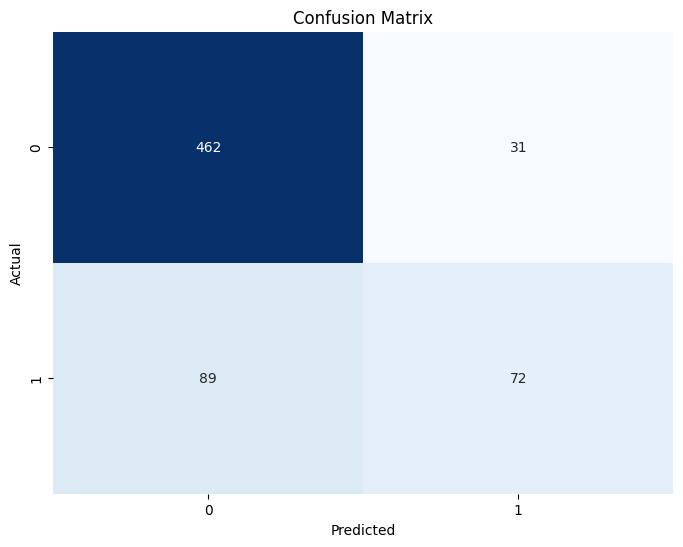

In [289]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Use the trained KNN model to make predictions on the test data
y_pred = KNN.predict(X_test)

# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



#  model -3 **Decision Tree**

In [290]:
Tree = DecisionTreeClassifier()

Tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [291]:
predictions = Tree.predict(X_test)
predictions

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,

In [292]:

from sklearn.metrics import accuracy_score, jaccard_score, f1_score

# Assuming you have trained your decision tree model and made predictions
Tree_Accuracy_Score = accuracy_score(y_test, predictions)
Tree_JaccardIndex = jaccard_score(y_test, predictions)
Tree_F1_Score = f1_score(y_test, predictions)

print("Tree_Accuracy_Score:", Tree_Accuracy_Score)
print("Tree_JaccardIndex:", Tree_JaccardIndex)
print("Tree_F1_Score:", Tree_F1_Score)


Tree_Accuracy_Score: 1.0
Tree_JaccardIndex: 1.0
Tree_F1_Score: 1.0


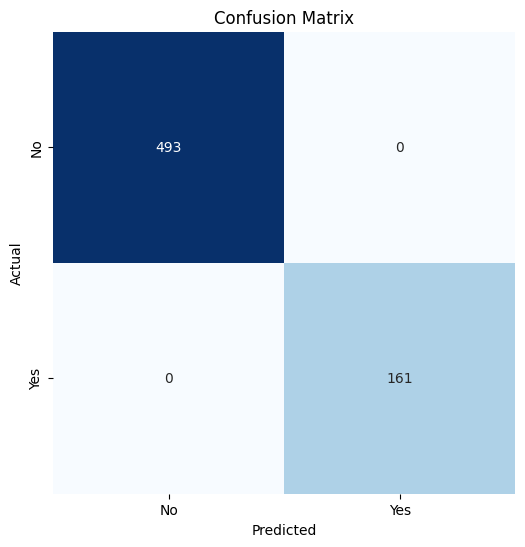

In [293]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
confusion = confusion_matrix(y_test, predictions)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False, square=True,
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# model ---- > 4   **Logistic Regression**

In [294]:
LR = LogisticRegression()
prediction =  LR.fit(X_train, y_train)

In [295]:
predictions = LR.predict(X_test)
predictions

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,

In [296]:
predict_proba = LR.predict_proba(X_test)
predict_proba

array([[0.9494685 , 0.0505315 ],
       [0.39721161, 0.60278839],
       [0.81569101, 0.18430899],
       ...,
       [0.93532946, 0.06467054],
       [0.28144531, 0.71855469],
       [0.6702987 , 0.3297013 ]])

In [297]:
LR.score(X_test,y_test)

0.8761467889908257

In [298]:
LR_Accuracy_Score = accuracy_score(y_test, predictions)
LR_JaccardIndex = jaccard_score(y_test, predictions)
LR_F1_Score = f1_score(y_test, predictions)
LR_Log_Loss = log_loss(y_test, predict_proba)

print("LR_Accuracy_Score",LR_Accuracy_Score)
print("LR_JaccardIndex",LR_JaccardIndex)
print("LR_F1_Score",LR_F1_Score)
print("LR_Log_Loss",LR_Log_Loss)

LR_Accuracy_Score 0.8761467889908257
LR_JaccardIndex 0.5714285714285714
LR_F1_Score 0.7272727272727273
LR_Log_Loss 0.2953964228346437


Logarithmic Loss (Log Loss):

How Much: Lower is better. Log loss is typically in the range of 0 to ∞.
Use: Commonly used for evaluating classification models, especially in probabilistic predictions.
It measures the performance of a classification model where the prediction is a probability value between 0 and 1.

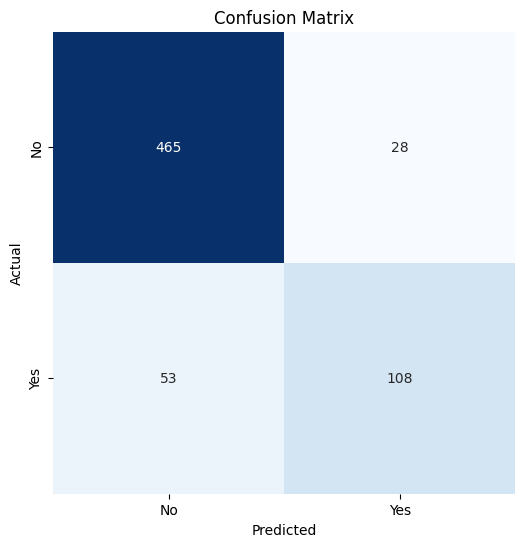

In [299]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
confusion = confusion_matrix(y_test, predictions)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False, square=True,
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


#model -> 5 **SVM**

In [300]:
from sklearn.svm import SVC
SVM = SVM = SVC(kernel='linear', C=1)
SVM.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [301]:
predictions = SVM.predict(X_test)
predictions

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,

In [302]:

SVM_Accuracy_Score = accuracy_score(y_test, predictions)
SVM_JaccardIndex = jaccard_score(y_test, predictions)
SVM_F1_Score = f1_score(y_test, predictions)

print("SVM_Accuracy_Score",SVM_Accuracy_Score)
print("SVM_JaccardIndex",SVM_JaccardIndex)
print("SVM_F1_Score",SVM_F1_Score)


SVM_Accuracy_Score 1.0
SVM_JaccardIndex 1.0
SVM_F1_Score 1.0


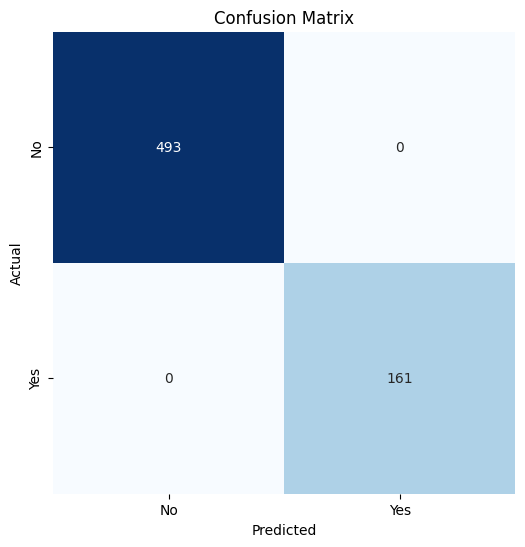

In [303]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
confusion = confusion_matrix(y_test, predictions)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False, square=True,
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [304]:
import pandas as pd


data = {'Model': ['Linear Regression', 'KNN', 'SVM', 'Logistic Regression'],
        'Accuracy': [LR_Accuracy_Score, KNN_Accuracy_Score, SVM_Accuracy_Score, LR_Accuracy_Score],
        'Jaccard Index': [LR_JaccardIndex, KNN_JaccardIndex, SVM_JaccardIndex, LR_JaccardIndex],
        'F1-Score': [LR_F1_Score, KNN_F1_Score, SVM_F1_Score, LR_F1_Score],
        'LogLoss': [LR_Log_Loss, None, None, LR_Log_Loss]}

df_metrics = pd.DataFrame(data)


print(df_metrics)


                 Model  Accuracy  Jaccard Index  F1-Score   LogLoss
0    Linear Regression  0.876147       0.571429  0.727273  0.295396
1                  KNN  0.816514       0.375000  0.545455       NaN
2                  SVM  1.000000       1.000000  1.000000       NaN
3  Logistic Regression  0.876147       0.571429  0.727273  0.295396
